In [1]:
import pandas as pd
import numpy as np
import os

#os.chdir("/Users/Jaebin/Documents/Stevens Fall 2019/Applied Analytics/") #set general working directory

county = pd.read_csv("Complete county file.csv") # specific directory for where the dataset is

In [2]:
county.columns

Index(['fipstate', 'fipscty', 'naics', 'empflag', 'emp_nf', 'emp', 'qp1_nf',
       'qp1', 'ap_nf', 'ap', 'est', 'n1_4', 'n5_9', 'n10_19', 'n20_49',
       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1',
       'n1000_2', 'n1000_3', 'n1000_4', 'censtate', 'cencty'],
      dtype='object')

In [3]:
county.shape

(2124893, 26)

In [4]:
county['fipstate'].value_counts().head()

48    145166
13     92273
51     86387
37     79650
39     79107
Name: fipstate, dtype: int64

In [5]:
# randomly sample 20000 samples
county = county.sample(300000).reset_index(drop = True)

In [6]:
county = county[(county.fipstate == 48)]

In [7]:
county.head()

,fipstate,fipscty,naics,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,...,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4,censtate,cencty
1,48,187,611699,A,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,187
13,48,479,4482//,NaN,G,301,G,1083,G,4461,...,0,0,0,0,0,0,0,0,74,479
41,48,167,561210,NaN,J,109,J,785,J,4117,...,0,0,0,0,0,0,0,0,74,167
68,48,453,624410,NaN,G,4280,G,20873,G,90024,...,1,1,0,0,0,0,0,0,74,453
77,48,481,211111,NaN,J,14,G,111,G,514,...,0,0,0,0,0,0,0,0,74,481


In [8]:
# combine small size companies into one category
county["sz_small"] = county["n1_4"] + county["n5_9"] + county["n10_19"] + county["n20_49"] + county["n50_99"]

# combine medium size companies into one category
county["sz_med"] = county["n100_249"] + county["n250_499"] + county["n500_999"]

# combine large size companies into one category
county["sz_lrg"] = county["n1000_1"] + county["n1000_2"] + county["n1000_3"] + county["n1000_4"]

county = county.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf", "censtate", "cencty",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

In [9]:
county.dtypes

fipstate     int64
fipscty      int64
naics       object
emp          int64
qp1          int64
ap           int64
est          int64
sz_small     int64
sz_med       int64
sz_lrg       int64
dtype: object

# for NACIS, removing "-" and "/" and converting to integers
# takes several minutes, you'll know when it's done from the icon on the window tab

for i in range(0,len(county["naics"])):
    a = str(county["naics"][i])
    if county["naics"][i] == "------":
        county["naics"][i] = 0
    elif "-" in county["naics"][i]:
        county["naics"][i] = int(a.replace("-", ""))        
    elif "/" in county["naics"][i]:
        county["naics"][i] = int(a.replace("/", ""))
    else:
        county["naics"][i] = int(a)

In [10]:
county.naics=county.naics.replace('-','',regex=True)
county.naics=county.naics.replace('/','',regex=True)

In [11]:
county.head()

,fipstate,fipscty,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
1,48,187,611699,0,0,0,3,3,0,0
13,48,479,4482,301,1083,4461,35,35,0,0
41,48,167,561210,109,785,4117,3,3,0,0
68,48,453,624410,4280,20873,90024,251,249,2,0
77,48,481,211111,14,111,514,4,4,0,0


In [12]:
county = county.add_prefix('COUNTY_')


In [13]:
county.head()

,COUNTY_fipstate,COUNTY_fipscty,COUNTY_naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg
1,48,187,611699,0,0,0,3,3,0,0
13,48,479,4482,301,1083,4461,35,35,0,0
41,48,167,561210,109,785,4117,3,3,0,0
68,48,453,624410,4280,20873,90024,251,249,2,0
77,48,481,211111,14,111,514,4,4,0,0


In [14]:
county.columns = ['fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp',
       'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small',
       'COUNTY_sz_med', 'COUNTY_sz_lrg']

## Your tasks

1. change the dataset your respective dataset
2. identify the columns and make sure the names are the same
3. if you have columns that aren't in the County data, use your judgement to drop or include it
4. go over the project proposal and understand exactly what we're trying to do
5. feel free to ask questions if you have. But if it's coding related, please try it on your own first
   and ask me or Sandeep if you really can't figure it out.

In [15]:
US_file = pd.read_csv('complete US file.csv',header=0, encoding='UTF-8')
US_file = US_file.drop(['uscode',  'empflag', 'emp_nf', 'qp1_nf',
       'ap_nf', 'f1_4', 'e1_4nf', 'e1_4', 'q1_4nf', 'q1_4',
       'a1_4nf', 'a1_4', 'f5_9', 'e5_9nf', 'e5_9', 'q5_9nf', 'q5_9',
       'a5_9nf', 'a5_9', 'f10_19', 'e10_19nf', 'e10_19', 'q10_19nf',
       'q10_19', 'a10_19nf', 'a10_19', 'f20_49', 'e20_49nf',
       'e20_49', 'q20_49nf', 'q20_49', 'a20_49nf', 'a20_49',
       'f50_99', 'e50_99nf', 'e50_99', 'q50_99nf', 'q50_99', 'a50_99nf',
       'a50_99', 'f100_249', 'e100_249nf', 'e100_249', 'q100_249nf',
       'q100_249', 'a100_249nf', 'a100_249', 'f250_499',
       'e250_499nf', 'e250_499', 'q250_499nf', 'q250_499', 'a250_499nf',
       'a250_499', 'f500_999', 'e500_999nf', 'e500_999',
       'q500_999nf', 'q500_999', 'a500_999nf', 'a500_999', 'f1000',
       'e1000nf', 'e1000', 'q1000nf', 'q1000', 'a1000nf', 'a1000'],axis=1)

In [16]:
# combine small size companies into one category
US_file["sz_small"] = US_file["n1_4"] + US_file["n5_9"] + US_file["n10_19"] + US_file["n20_49"] + US_file["n50_99"]

# combine medium size companies into one category
US_file["sz_med"] = US_file["n100_249"] + US_file["n250_499"] + US_file["n500_999"]

# combine large size companies into one category
US_file["sz_lrg"] = US_file["n1000"] 

US_file = US_file.drop(columns = [
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000" ])

In [17]:
US_file.naics=US_file.naics.replace('-','',regex=True)
US_file.naics=US_file.naics.replace('/','',regex=True)
#US_file.lfo=US_file.lfo.replace('-','',regex=True)

In [18]:
US_file.head()

,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,,-,126752238,1604399617,6435142055,7757807,7568676,181471,7660
1,,C,55545767,888858468,3363492811,2114076,2014258,95948,3870
2,,Z,33631600,313406667,1405230530,3251536,3213293,37534,709
3,,S,4749707,37112956,157784272,899679,895824,3715,140
4,,P,14926406,167485849,682046178,883952,861739,21636,577


In [19]:
US_file = US_file.add_prefix('US_')



In [20]:
US_file.columns

Index(['US_naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [21]:
US_file.columns = ['naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg']

In [22]:
state = pd.read_csv("complete state file.csv") # specific directory for where the dataset is

In [23]:
# combine small size companies into one category
state["sz_small"] = state["n1_4"] + state["n5_9"] + state["n10_19"] + state["n20_49"] + state["n50_99"]

# combine medium size companies into one category
state["sz_med"] = state["n100_249"] + state["n250_499"] + state["n500_999"]

# combine large size companies into one category
state["sz_lrg"] = state["n1000"] 
state = state.drop(columns = ["f500_999","f1_4","e1_4nf","empflag","q1_4nf","a1_4nf","e5_9nf","q5_9nf","a5_9nf","f10_19","e10_19nf","q10_19nf","a10_19nf","f20_49","e20_49nf","q20_49nf","emp_nf", "qp1_nf", "ap_nf", "censtate","f1000",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000","e50_99nf","q50_99nf","a50_99nf","f100_249","e100_249nf","q100_249nf","a100_249nf","e250_499nf","q250_499nf","a250_499nf","e500_999nf","q500_999nf","a500_999nf","e1000nf","q1000nf","a1000nf",
                                    'e1_4', 'q1_4',
                               'a1_4', 'f5_9', 'e5_9', 'q5_9', 'a5_9', 'e10_19', 'q10_19', 'a10_19',
                               'e20_49', 'q20_49', 'a20_49nf', 'a20_49', 'f50_99', 'e50_99', 'q50_99',
                               'a50_99', 'e100_249', 'q100_249', 'a100_249', 'f250_499', 'e250_499',
                               'q250_499', 'a250_499', 'e500_999', 'q500_999', 'a500_999', 'e1000',
                               'q1000', 'a1000', ])

In [24]:
state.head()

,fipstate,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,1,------,-,1673249,16667378,68970623,99584,97088,2404,92
1,1,------,C,766685,8868459,35219759,28682,27284,1349,49
2,1,------,Z,473577,4150278,18378077,37856,37302,541,13
3,1,------,S,67223,490235,2119042,11465,11413,50,2
4,1,------,P,180868,1518668,6433918,11941,11691,243,7


In [25]:
state.naics=state.naics.replace('-','',regex=True)

In [26]:
state.naics=state.naics.replace('/','',regex=True)

In [27]:
state.isnull().sum()

fipstate    0
naics       0
lfo         0
emp         0
qp1         0
ap          0
est         0
sz_small    0
sz_med      0
sz_lrg      0
dtype: int64

In [28]:
state.shape

(448310, 10)

In [29]:
#state['fipstate'].value_counts()


In [30]:
state = state.add_prefix('state_')



In [31]:
state.columns

Index(['state_fipstate', 'state_naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg'],
      dtype='object')

In [32]:
state.columns = ['fipstate', 'naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg']

In [33]:
county.columns

Index(['fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp', 'COUNTY_qp1',
       'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med',
       'COUNTY_sz_lrg'],
      dtype='object')

In [34]:
metro = pd.read_csv("complete metropolitan area file.csv") # specific directory for where the dataset is

In [35]:
# combine small size companies into one category
metro["sz_small"] = metro["n1_4"] + metro["n5_9"] + metro["n10_19"] + metro["n20_49"] + metro["n50_99"]

# combine medium size companies into one category
metro["sz_med"] = metro["n100_249"] + metro["n250_499"] + metro["n500_999"]

# combine large size companies into one category
metro["sz_lrg"] = metro["n1000_1"] + metro["n1000_2"] + metro["n1000_3"] + metro["n1000_4"]



In [36]:
metro = metro.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

In [37]:
metro.naics=metro.naics.replace('-','',regex=True)
metro.naics=metro.naics.replace('/','',regex=True)

In [38]:
metro.head()

,msa,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,10100,,19533,173691,746190,1418,1390,27,1
1,10100,11,20,188,1161,8,8,0,0
2,10100,115,20,188,1161,8,8,0,0
3,10100,1151,20,188,1159,7,7,0,0
4,10100,11511,20,188,1159,7,7,0,0


In [39]:
metro = metro.add_prefix('metro_')

In [40]:
metro.columns

Index(['metro_msa', 'metro_naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg'],
      dtype='object')

In [41]:
metro.columns = ['metro_msa', 'naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg']

In [42]:
cs = [county,state] 

In [43]:
from functools import reduce

In [44]:
C_S = reduce(lambda left,right: pd.merge(left,right,on=['naics','fipstate']), cs) #reducting naics to 1 from 2

In [45]:
C_S.head()

,fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_lfo,state_emp,state_qp1,state_ap,state_est,state_sz_small,state_sz_med,state_sz_lrg
0,48,187,611699,0,0,0,3,3,0,0,-,3276,18348,82041,439,437,2,0
1,48,187,611699,0,0,0,3,3,0,0,C,808,4451,17849,68,67,1,0
2,48,187,611699,0,0,0,3,3,0,0,Z,861,5801,28557,164,164,0,0
3,48,187,611699,0,0,0,3,3,0,0,S,187,476,2036,56,56,0,0
4,48,187,611699,0,0,0,3,3,0,0,P,541,2097,10502,79,79,0,0


In [46]:
csus= [C_S,US_file]

In [47]:
S_US = reduce(lambda left,right: pd.merge(left,right,on='naics'), csus) #reducting naics to 1 from 2

In [48]:
S_US.head(10)

,fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,...,state_sz_med,state_sz_lrg,US_lfo,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,48,187,611699,0,0,0,3,3,0,0,...,2,0,-,51899,313039,1359848,6735,6686,49,0
1,48,187,611699,0,0,0,3,3,0,0,...,2,0,C,13053,94122,382036,772,744,28,0
2,48,187,611699,0,0,0,3,3,0,0,...,2,0,Z,13820,81474,370113,2726,2719,7,0
3,48,187,611699,0,0,0,3,3,0,0,...,2,0,S,4089,11271,52412,849,847,2,0
4,48,187,611699,0,0,0,3,3,0,0,...,2,0,P,7045,29269,133911,896,896,0,0
5,48,187,611699,0,0,0,3,3,0,0,...,2,0,N,13880,96894,421347,1489,1477,12,0
6,48,187,611699,0,0,0,3,3,0,0,...,2,0,O,0,0,0,3,3,0,0
7,48,187,611699,0,0,0,3,3,0,0,...,1,0,-,51899,313039,1359848,6735,6686,49,0
8,48,187,611699,0,0,0,3,3,0,0,...,1,0,C,13053,94122,382036,772,744,28,0
9,48,187,611699,0,0,0,3,3,0,0,...,1,0,Z,13820,81474,370113,2726,2719,7,0


In [49]:
S_US.shape

(874041, 26)

In [50]:
np.sqrt(881500)

938.88231424391

In [51]:
100*(1/938.88231424391)

0.1065096215818389

In [52]:

Texas_data= S_US


In [53]:
Texas_data['US_lfo'].head()

0    -
1    C
2    Z
3    S
4    P
Name: US_lfo, dtype: object

In [54]:
Texas_data['state_lfo'].head()

0    -
1    -
2    -
3    -
4    -
Name: state_lfo, dtype: object

COUNTY_Avg_AP_I annual Payroll of an industry = Annual Payroll for the industry / No. of establishments in
the industry

In [55]:
Texas_data['COUNTY_Avg_AP_I'] = Texas_data['COUNTY_ap'] / Texas_data['COUNTY_est']

In [56]:
Texas_data['State_Avg_AP_I'] = Texas_data['state_ap'] / Texas_data['state_est']

In [57]:
Texas_data['US_Avg_AP_I'] = Texas_data['US_ap'] / Texas_data['US_est']

In [58]:
First_review_data = Texas_data.sample(6254).reset_index(drop = True)

In [59]:
x=pd.DataFrame(First_review_data['naics'])

In [60]:
Texas_data['COUNTY_Avg_AP_I'].describe()

count    874041.000000
mean        308.736812
std        1992.786627
min           0.000000
25%           0.000000
50%           0.000000
75%         219.250000
max      114060.333333
Name: COUNTY_Avg_AP_I, dtype: float64

In [61]:
import seaborn as sns
sns.boxplot(x=First_review_data.COUNTY_Avg_AP_I)

In [62]:
#First_review_data_in = First_review_data[First_review_data['naics']==62]
First_review_data= First_review_data.loc[First_review_data.naics.astype(str).str.startswith('62')]

In [63]:
categorical = First_review_data.select_dtypes(include=['object']) 

In [64]:
categorical.columns

Index(['naics', 'state_lfo', 'US_lfo'], dtype='object')

In [65]:
naics=categorical['naics']



In [66]:
categorical = categorical.drop(columns=['naics'])

In [67]:
numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','COUNTY_fipscty','fipstate'])

In [68]:
numerical.head()

,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_emp,state_qp1,state_ap,...,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg,COUNTY_Avg_AP_I,State_Avg_AP_I,US_Avg_AP_I
11,95,1818,8315,4,4,0,0,1765,26721,113989,...,147571,1802567,7913619,6847,6715,129,3,2078.750000,678.505952,1155.779027
13,0,0,0,3,3,0,0,311,3861,15636,...,557,5448,23078,80,80,0,0,0.000000,625.440000,288.475000
17,0,0,0,1,1,0,0,1089,7729,33441,...,127883,1142630,4987657,21929,21918,11,0,0.000000,278.675000,227.445711
38,32,197,807,6,6,0,0,311,3861,15636,...,142459,1098229,4554700,29788,29787,1,0,134.500000,625.440000,152.903854
76,710,3493,15245,28,26,2,0,12876,67246,296186,...,210172,1129051,4866431,5908,5524,383,1,544.464286,771.317708,823.701930


In [69]:
from sklearn import preprocessing 

In [70]:
#numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','fipstate', 'COUNTY_fipscty'])
numerical = First_review_data.drop(columns=['naics','fipstate','COUNTY_fipscty' ,'state_lfo', 'US_lfo','COUNTY_Avg_AP_I','State_Avg_AP_I','US_Avg_AP_I'])

In [71]:
First_review_data.shape

(559, 29)

In [72]:
target=First_review_data[['COUNTY_Avg_AP_I']]

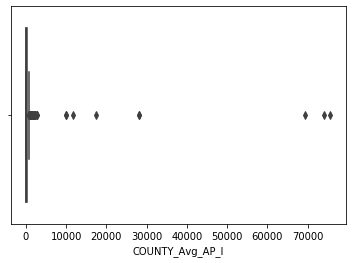

In [73]:
import seaborn as sns
sns.boxplot(x=First_review_data.COUNTY_Avg_AP_I)

In [74]:
targets= First_review_data[['COUNTY_Avg_AP_I','State_Avg_AP_I','US_Avg_AP_I']]

In [75]:
targets.head()

,COUNTY_Avg_AP_I,State_Avg_AP_I,US_Avg_AP_I
11,2078.750000,678.505952,1155.779027
13,0.000000,625.440000,288.475000
17,0.000000,278.675000,227.445711
38,134.500000,625.440000,152.903854
76,544.464286,771.317708,823.701930


In [76]:
numerical.columns

Index(['COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est',
       'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg', 'state_emp',
       'state_qp1', 'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est', 'US_sz_small',
       'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [77]:
standardized_num = preprocessing.scale(numerical)

In [78]:
standardized_num = pd.DataFrame(standardized_num)

In [79]:
standardized_num.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.112913,-0.073869,-0.072378,-0.186508,-0.182583,-0.208177,-0.068197,-0.429247,-0.370593,-0.368762,...,-0.307806,-0.413296,-0.281891,-0.273433,-0.215133,-0.212495,-0.268779,-0.264633,-0.316036,-0.189199
1,-0.133627,-0.099072,-0.099195,-0.195568,-0.191852,-0.208177,-0.068197,-0.449046,-0.397720,-0.395589,...,-0.341080,-0.413296,-0.281891,-0.438846,-0.368173,-0.367096,-0.386327,-0.381312,-0.419788,-0.207136
2,-0.133627,-0.099072,-0.099195,-0.213689,-0.210391,-0.208177,-0.068197,-0.438452,-0.393130,-0.390732,...,-0.318975,-0.413296,-0.281891,-0.295585,-0.271332,-0.269824,-0.006792,0.002719,-0.410941,-0.207136
3,-0.126650,-0.096341,-0.096593,-0.168387,-0.164045,-0.208177,-0.068197,-0.449046,-0.397720,-0.395589,...,-0.341080,-0.413296,-0.281891,-0.279185,-0.275113,-0.278307,0.129726,0.141099,-0.418983,-0.207136
4,0.021185,-0.050649,-0.050028,0.030941,0.021341,0.299993,-0.068197,-0.277948,-0.322505,-0.319067,...,-0.262432,-0.221431,-0.281891,-0.202998,-0.272488,-0.272200,-0.285090,-0.285577,-0.111749,-0.201157


In [80]:
standardized_num.columns =[ 'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap',
       'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg',
       'state_emp', 'state_qp1', 'state_ap', 'state_est', 'state_sz_small',
       'state_sz_med', 'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg']

In [81]:
First_review_data['COUNTY_fipscty'].head()

11    259
13     17
17    445
38     89
76    141
Name: COUNTY_fipscty, dtype: int64

In [82]:
CAT_DATA = pd.get_dummies(categorical)

In [83]:
CAT_DATA.head()

,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,US_lfo_-,US_lfo_C,US_lfo_G,US_lfo_N,US_lfo_O,US_lfo_P,US_lfo_S,US_lfo_Z
11,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
17,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
76,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [84]:
standardized_num.head()

,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_emp,state_qp1,state_ap,...,state_sz_small,state_sz_med,state_sz_lrg,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,-0.112913,-0.073869,-0.072378,-0.186508,-0.182583,-0.208177,-0.068197,-0.429247,-0.370593,-0.368762,...,-0.307806,-0.413296,-0.281891,-0.273433,-0.215133,-0.212495,-0.268779,-0.264633,-0.316036,-0.189199
1,-0.133627,-0.099072,-0.099195,-0.195568,-0.191852,-0.208177,-0.068197,-0.449046,-0.397720,-0.395589,...,-0.341080,-0.413296,-0.281891,-0.438846,-0.368173,-0.367096,-0.386327,-0.381312,-0.419788,-0.207136
2,-0.133627,-0.099072,-0.099195,-0.213689,-0.210391,-0.208177,-0.068197,-0.438452,-0.393130,-0.390732,...,-0.318975,-0.413296,-0.281891,-0.295585,-0.271332,-0.269824,-0.006792,0.002719,-0.410941,-0.207136
3,-0.126650,-0.096341,-0.096593,-0.168387,-0.164045,-0.208177,-0.068197,-0.449046,-0.397720,-0.395589,...,-0.341080,-0.413296,-0.281891,-0.279185,-0.275113,-0.278307,0.129726,0.141099,-0.418983,-0.207136
4,0.021185,-0.050649,-0.050028,0.030941,0.021341,0.299993,-0.068197,-0.277948,-0.322505,-0.319067,...,-0.262432,-0.221431,-0.281891,-0.202998,-0.272488,-0.272200,-0.285090,-0.285577,-0.111749,-0.201157


In [85]:
target.head()

,COUNTY_Avg_AP_I
11,2078.750000
13,0.000000
17,0.000000
38,134.500000
76,544.464286


In [86]:
#n= [First_review_data['COUNTY_fipscty'],CAT_DATA,standardized_num,target]

In [87]:
#n= First_review_data['COUNTY_fipscty'].join(CAT_DATA)
#n = pd.concat([First_review_data['COUNTY_fipscty'],CAT_DATA,standardized_num,target],ignore_index=True,axis=1,sort=False)

In [88]:
 n = pd.merge(First_review_data['COUNTY_fipscty'], target, left_index=True, right_index=True, how='outer')


In [89]:
n.shape

(559, 2)

In [90]:
n_1= pd.merge(n,CAT_DATA,left_index=True, right_index=True, how='outer')



In [91]:
n_1.head()

,COUNTY_fipscty,COUNTY_Avg_AP_I,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,US_lfo_-,US_lfo_C,US_lfo_G,US_lfo_N,US_lfo_O,US_lfo_P,US_lfo_S,US_lfo_Z
11,259,2078.750000,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
13,17,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
17,445,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
38,89,134.500000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
76,141,544.464286,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [92]:
standardized_num.head()

,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_emp,state_qp1,state_ap,...,state_sz_small,state_sz_med,state_sz_lrg,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,-0.112913,-0.073869,-0.072378,-0.186508,-0.182583,-0.208177,-0.068197,-0.429247,-0.370593,-0.368762,...,-0.307806,-0.413296,-0.281891,-0.273433,-0.215133,-0.212495,-0.268779,-0.264633,-0.316036,-0.189199
1,-0.133627,-0.099072,-0.099195,-0.195568,-0.191852,-0.208177,-0.068197,-0.449046,-0.397720,-0.395589,...,-0.341080,-0.413296,-0.281891,-0.438846,-0.368173,-0.367096,-0.386327,-0.381312,-0.419788,-0.207136
2,-0.133627,-0.099072,-0.099195,-0.213689,-0.210391,-0.208177,-0.068197,-0.438452,-0.393130,-0.390732,...,-0.318975,-0.413296,-0.281891,-0.295585,-0.271332,-0.269824,-0.006792,0.002719,-0.410941,-0.207136
3,-0.126650,-0.096341,-0.096593,-0.168387,-0.164045,-0.208177,-0.068197,-0.449046,-0.397720,-0.395589,...,-0.341080,-0.413296,-0.281891,-0.279185,-0.275113,-0.278307,0.129726,0.141099,-0.418983,-0.207136
4,0.021185,-0.050649,-0.050028,0.030941,0.021341,0.299993,-0.068197,-0.277948,-0.322505,-0.319067,...,-0.262432,-0.221431,-0.281891,-0.202998,-0.272488,-0.272200,-0.285090,-0.285577,-0.111749,-0.201157


In [93]:
#n_2= pd.merge(n_1,standardized_num,left_index=True, right_index=True, how='outer')
#n_1['joincol'] = 1
#standardized_num['joincol'] = 1


In [94]:
n_1['new_col'] = range(1, len(n_1) + 1)


In [95]:
standardized_num['new_col'] = range(1, len(standardized_num) + 1)

In [96]:
n_3=pd.merge(left=n_1,right=standardized_num, on='new_col', how='outer')

In [97]:
#n_2= pd.merge(standardized_num,n_1,left_index=True, right_index=True, how='outer')

In [98]:
n_3.shape

(559, 40)

In [99]:
n3=n_3.drop(columns=['new_col'])

In [100]:
FINAL_Texas_DATA = n_3

In [101]:
FINAL_Texas_DATA.columns

Index(['COUNTY_fipscty', 'COUNTY_Avg_AP_I', 'state_lfo_-', 'state_lfo_C',
       'state_lfo_G', 'state_lfo_N', 'state_lfo_O', 'state_lfo_P',
       'state_lfo_S', 'state_lfo_Z', 'US_lfo_-', 'US_lfo_C', 'US_lfo_G',
       'US_lfo_N', 'US_lfo_O', 'US_lfo_P', 'US_lfo_S', 'US_lfo_Z', 'new_col',
       'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est',
       'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg', 'state_emp',
       'state_qp1', 'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est', 'US_sz_small',
       'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [102]:
#FINAL_Texas_DATA=FINAL_Texas_DATA.drop(columns=['joincol_x','new_col','joincol_y'])

In [103]:
FINAL_Texas_DATA.columns

Index(['COUNTY_fipscty', 'COUNTY_Avg_AP_I', 'state_lfo_-', 'state_lfo_C',
       'state_lfo_G', 'state_lfo_N', 'state_lfo_O', 'state_lfo_P',
       'state_lfo_S', 'state_lfo_Z', 'US_lfo_-', 'US_lfo_C', 'US_lfo_G',
       'US_lfo_N', 'US_lfo_O', 'US_lfo_P', 'US_lfo_S', 'US_lfo_Z', 'new_col',
       'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est',
       'COUNTY_sz_small', 'COUNTY_sz_med', 'COUNTY_sz_lrg', 'state_emp',
       'state_qp1', 'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg', 'US_emp', 'US_qp1', 'US_ap', 'US_est', 'US_sz_small',
       'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [104]:
FINAL_Texas_DATA.isnull().sum()

COUNTY_fipscty     0
COUNTY_Avg_AP_I    0
state_lfo_-        0
state_lfo_C        0
state_lfo_G        0
state_lfo_N        0
state_lfo_O        0
state_lfo_P        0
state_lfo_S        0
state_lfo_Z        0
US_lfo_-           0
US_lfo_C           0
US_lfo_G           0
US_lfo_N           0
US_lfo_O           0
US_lfo_P           0
US_lfo_S           0
US_lfo_Z           0
new_col            0
COUNTY_emp         0
COUNTY_qp1         0
COUNTY_ap          0
COUNTY_est         0
COUNTY_sz_small    0
COUNTY_sz_med      0
COUNTY_sz_lrg      0
state_emp          0
state_qp1          0
state_ap           0
state_est          0
state_sz_small     0
state_sz_med       0
state_sz_lrg       0
US_emp             0
US_qp1             0
US_ap              0
US_est             0
US_sz_small        0
US_sz_med          0
US_sz_lrg          0
dtype: int64

In [105]:
FINAL_Texas_DATA.COUNTY_Avg_AP_I.describe()

count      559.000000
mean       827.730159
std       5678.149008
min          0.000000
25%          0.000000
50%          0.000000
75%        330.761905
max      75633.842697
Name: COUNTY_Avg_AP_I, dtype: float64

In [106]:
T_D = FINAL_Texas_DATA[FINAL_Texas_DATA.COUNTY_Avg_AP_I != 0]

T_D['COUNTY_Avg_AP_I'].describe()



count      275.000000
mean      1682.549668
std       8013.483600
min         36.000000
25%        200.466667
50%        333.282609
75%        717.544850
max      75633.842697
Name: COUNTY_Avg_AP_I, dtype: float64

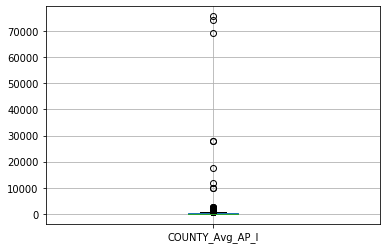

In [107]:
FINAL_Texas_DATA.boxplot(column=['COUNTY_Avg_AP_I'])

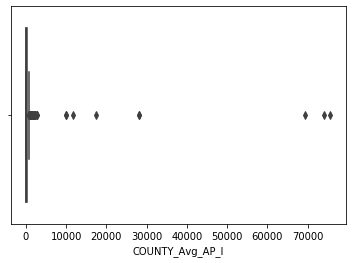

In [108]:
import seaborn as sns
sns.boxplot(x=FINAL_Texas_DATA.COUNTY_Avg_AP_I)

# 'extremely_low' =0-6
# 'low'=6-120
# 'med'=120-551
# 'high'=551-95690


In [109]:
FINAL_Texas_DATA['Countybins'] = pd.cut(x= FINAL_Texas_DATA['COUNTY_Avg_AP_I'], bins=[0,11,393,937,108066],labels = ['0','1', '2', '3'],include_lowest=True)

In [110]:
FINAL_Texas_DATA=FINAL_Texas_DATA.dropna()

In [111]:
Ctrain_Y=FINAL_Texas_DATA['Countybins']



In [112]:
FINAL_Texas_DATA.isnull().sum()

COUNTY_fipscty     0
COUNTY_Avg_AP_I    0
state_lfo_-        0
state_lfo_C        0
state_lfo_G        0
state_lfo_N        0
state_lfo_O        0
state_lfo_P        0
state_lfo_S        0
state_lfo_Z        0
US_lfo_-           0
US_lfo_C           0
US_lfo_G           0
US_lfo_N           0
US_lfo_O           0
US_lfo_P           0
US_lfo_S           0
US_lfo_Z           0
new_col            0
COUNTY_emp         0
COUNTY_qp1         0
COUNTY_ap          0
COUNTY_est         0
COUNTY_sz_small    0
COUNTY_sz_med      0
COUNTY_sz_lrg      0
state_emp          0
state_qp1          0
state_ap           0
state_est          0
state_sz_small     0
state_sz_med       0
state_sz_lrg       0
US_emp             0
US_qp1             0
US_ap              0
US_est             0
US_sz_small        0
US_sz_med          0
US_sz_lrg          0
Countybins         0
dtype: int64

In [113]:
FINAL_Texas_DATA = FINAL_Texas_DATA.drop(columns = ["Countybins"])

In [114]:
#FINAL_Texas_DATA= FINAL_Texas_DATA.drop(columns=['naics'])

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_Ctrain, X_Cval, y_Ctrain, y_Cval = train_test_split(FINAL_Texas_DATA,Ctrain_Y,test_size = 0.3,random_state = 123)

In [117]:
X_Ctrain.shape

(391, 40)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn import datasets
from sklearn.feature_selection import RFE

In [119]:
logreg = LogisticRegression() #

In [120]:
y_Ctrain.isnull().sum()

0

In [121]:
#logreg.fit(X_Ctrain, y_Ctrain) #fitting the model 
X_Ctrain.shape

(391, 40)

In [122]:
y_Ctrain.shape

(391,)

In [123]:
#y_pred_County = linreg.predict(X_Cval)
#print(metrics.mean_squared_error(y_Cval, y_pred_County))
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_Ctrain, y_Ctrain) # performing RFE for variable ranks
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False False  True False  True False
 False False  True False  True False False  True  True  True  True  True
  True  True False False  True False  True False False  True False  True
 False  True  True False]
[22 18  1 13  3 17 15  8  1  2  1  6 14 11  1 16  1  4 23  1  1  1  1  1
  1  1 19  9  1 12  1 21 10  1  7  1  5  1  1 20]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

In [124]:
feature_names = list(X_Ctrain.columns.values)

In [125]:
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), feature_names)))

[(1, 'COUNTY_ap'), (1, 'COUNTY_emp'), (1, 'COUNTY_est'), (1, 'COUNTY_qp1'), (1, 'COUNTY_sz_lrg'), (1, 'COUNTY_sz_med'), (1, 'COUNTY_sz_small'), (1, 'US_ap'), (1, 'US_emp'), (1, 'US_lfo_-'), (1, 'US_lfo_O'), (1, 'US_lfo_S'), (1, 'US_sz_med'), (1, 'US_sz_small'), (1, 'state_ap'), (1, 'state_lfo_-'), (1, 'state_lfo_S'), (1, 'state_sz_small'), (2, 'state_lfo_Z'), (3, 'state_lfo_G'), (4, 'US_lfo_Z'), (5, 'US_est'), (6, 'US_lfo_C'), (7, 'US_qp1'), (8, 'state_lfo_P'), (9, 'state_qp1'), (10, 'state_sz_lrg'), (11, 'US_lfo_N'), (12, 'state_est'), (13, 'state_lfo_C'), (14, 'US_lfo_G'), (15, 'state_lfo_O'), (16, 'US_lfo_P'), (17, 'state_lfo_N'), (18, 'COUNTY_Avg_AP_I'), (19, 'state_emp'), (20, 'US_sz_lrg'), (21, 'state_sz_med'), (22, 'COUNTY_fipscty'), (23, 'new_col')]


In [126]:
FINAL_Texas_DATA = FINAL_Texas_DATA.drop(columns = ['US_lfo_N', 'US_lfo_S', 'COUNTY_sz_lrg', 'US_est', 'state_lfo_P', 'US_lfo_P','US_lfo_C','state_lfo_C', 'state_lfo_O', 'state_lfo_S', 'state_lfo_N', 'COUNTY_Avg_AP_I', 'state_lfo_G', 'US_emp','US_ap', 'state_emp', 'US_qp1', 'COUNTY_fipscty'])

In [128]:
FINAL_Texas_DATA.columns

Index(['state_lfo_-', 'state_lfo_Z', 'US_lfo_-', 'US_lfo_G', 'US_lfo_O',
       'US_lfo_Z', 'new_col', 'COUNTY_emp', 'COUNTY_qp1', 'COUNTY_ap',
       'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg', 'US_sz_small', 'US_sz_med', 'US_sz_lrg'],
      dtype='object')

## Should drop couple of columns based on the rankings

In [ ]:
X_Ctrain, X_Cval, y_Ctrain, y_Cval = train_test_split(FINAL_Texas_DATA,Ctrain_Y,test_size = 0.4,random_state = 123)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_Ctrain, y_Ctrain) #fitting the model 

In [ ]:
y_pred_val = logreg.predict(X_Cval)

In [ ]:
#y_Cval

In [ ]:
y_pred_val = pd.DataFrame(y_pred_val)

In [ ]:
y_pred_val

In [ ]:
print(metrics.classification_report(y_Cval,y_pred_val))

In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_glm = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0) #fitting the Gridsearch model
best_model = clf_glm.fit(X_Ctrain, y_Ctrain)

In [ ]:
# View best hyperparameters 
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
    #randomForestClassifier
rfc = RandomForestClassifier( oob_score=True, random_state=123456, class_weight= 'balanced')
rfc.fit(X_Ctrain, y_Ctrain)



In [ ]:
#Accuracy score
predicted = rfc.predict(X_Ctrain) #predicting
pred_RFC= pd.DataFrame(predicted) #prediction dataframe
print(metrics.classification_report(y_Ctrain, predicted)) 

In [ ]:
#Accuracy score
predicted = rfc.predict(X_Cval) #predicting
pred_RFC= pd.DataFrame(predicted) #prediction dataframe
print(metrics.classification_report(y_Cval, predicted)) 

In [ ]:
scores = cross_val_score(rfc,X_Ctrain, y_Ctrain,cv=10)  #cross validation
np.array(scores).mean() 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_Ctrain, y_Ctrain) #fitting the model on data and target

In [ ]:
# performing Gridsearch on Decisiontree classifier
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'min_samples_split': [2,5,10,15,20,25,30,35,40,50,60],'min_samples_leaf': [1, 5, 10, 15, 20],
              'max_leaf_nodes': [None, 5, 10, 20]}
GridDt = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

In [ ]:
GridDt.fit(X_Ctrain, y_Ctrain) #fitting Grid model on data and target

In [ ]:
print(GridDt.best_params_)

In [ ]:
clf_giniFI = DecisionTreeClassifier(criterion = "entropy",max_depth=20,min_samples_leaf = 1,min_samples_split = 2)

In [ ]:
clf_g= clf_giniFI.fit(X_Ctrain, y_Ctrain)

In [ ]:
y_pred_val_giniFI = clf_g.predict(X_Cval)
print(metrics.classification_report(y_Cval, y_pred_val_giniFI))


In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf  

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=22, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_Ctrain, y_Ctrain, epochs=50, batch_size=64)
# evaluate the keras model
_, accuracy = model.evaluate(X_Ctrain, y_Ctrain)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
    model = Sequential()
#    model.add(Dense(20, input_dim=22, activation='relu'))
    model.add(Dense(12,input_dim=22, activation='relu'))
    model.add(Dense(8, activation='relu'))
#    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# performing Gridsearch on Decisiontree classifier
from sklearn.model_selection import GridSearchCV
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(optimizer=optimizer)
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
param_grid = dict(init_mode=init_mode)
param_grid = dict(activation=activation)
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
param_grid = dict(neurons=neurons)

param_grid = dict(batch_size=batch_size, epochs=epochs)
param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_Ctrain, y_Ctrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3) #using KNN
KNN_clf.fit(X_Ctrain, y_Ctrain)

knn_pred = KNN_clf.predict(X_Cval)
pred_2= pd.DataFrame(knn_pred)
print(metrics.classification_report(y_Cval, pred_2))

In [ ]:
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
nbc = naive_bayes.GaussianNB()
nbc.fit(X_Ctrain, y_Ctrain)
print(metrics.classification_report(nbc.predict(X_Cval) , y_Cval))

In [ ]:
from sklearn.svm import SVC
svm_linear_clf = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
svm_linear_clf.fit(X_Ctrain, y_Ctrain)

In [ ]:
pred_linear = svm_linear_clf.predict(X_Cval)
pred_linear_mod= pd.DataFrame(pred_linear)
print(metrics.classification_report(y_Cval, pred_linear_mod))

In [ ]:
svm_clf = SVC(kernel='rbf', 
            class_weight='balanced', # penalize
            probability=True)
 
svm_clf.fit(X_Ctrain, y_Ctrain)

In [ ]:
pred = svm_clf.predict(X_Cval)
pred_1= pd.DataFrame(pred)
print(metrics.classification_report(y_Cval, pred_1))

In [ ]:
svm_clf = SVC(kernel='poly', 
            class_weight='balanced', # penalize
            probability=True)
 
svm_clf.fit(X_Ctrain, y_Ctrain)

In [ ]:
pred = svm_clf.predict(X_Cval)
pred_1= pd.DataFrame(pred)
print(metrics.classification_report(y_Cval, pred_1))